# Python import

In [1]:
from naat_core.data_files import GLOBAL_LITIGATION_CASES_PATH
import pandas as pd
import numpy as np

# Importing global cases for sabin center

https://climatecasechart.com/about/

In [2]:
global_cases_df = pd.read_csv(GLOBAL_LITIGATION_CASES_PATH)
global_cases_df

,Title,ID,Case Permalink,Case Categories,Jurisdictions,Principal Laws,Summary,Reporter Info or Case Number,Filing Year,Status,Core Object
0,Aldous v. Greater Taree City Council and Another,2204,https://climatecasechart.com/non-us-case/aldou...,Suits against governments>Environmental assess...,Australia>New South Wales>Land and Environment...,Australia,An Australian court upheld approval of a devel...,Land and Environment Court of New South Wales ...,2009.0,NaN,NaN
1,Ground Crew at Turramurra v. Ku-ring-gai Council,2504,https://climatecasechart.com/non-us-case/groun...,Suits against governments>Environmental assess...,Australia>New South Wales>Land and Environment...,Australia>Environmental Planning and Assessmen...,Applicant appealed the denial of a permit for ...,[2008] NSWLEC 86 (Australia),2008.0,Appeal dismissed,Appeal of denial of a planning permit due to r...
2,Haughton v. Minister for Department of Plannin...,2505,https://climatecasechart.com/non-us-case/haugh...,Suits against governments>Environmental assess...,Australia>New South Wales>Land and Environment...,Australia>Precautionary Principle|Australia>Pr...,Ned Haughton challenged the approval granted b...,[2011] NSWLEC 217 (Australia),2011.0,Application dismissed,Challenge to government approval of two coal-f...
3,Able Lott Holdings Pty. Ltd. v. City of Fremantle,2508,https://climatecasechart.com/non-us-case/able-...,Suits against governments>Environmental assess...,Australia>Western Australia>State Administrati...,Australia>State Coastal Planning Policy (Weste...,This case concerned a development application ...,[2010] WASAT 117 (Australia),2010.0,Application dismissed,Challenge to approve development of site despi...
4,Aldous v. Greater Taree City Council and Another,2510,https://climatecasechart.com/non-us-case/aldou...,NaN,Australia>New South Wales>Land and Environment...,Australia,An Australian court upheld approval of a deve...,[ 2009 ] NCWELC 17 (Australia),2009.0,Application dismissed,Challenge to city council decision granting de...
...,...,...,...,...,...,...,...,...,...,...,...
785,Complaint to ACCC regarding APPEA,19878,https://climatecasechart.com/?post_type=non_us...,"Suits against corporations, individuals",Australia>Australian Competition and Consumer ...,NaN,"On 17 July 2023, Lock the Gate and Comms Decla...",NaN,2023.0,Pending,Whether APPEA’s representations about the ‘fut...
786,ASIC v Vanguard Investments Australia Ltd,19879,https://climatecasechart.com/?post_type=non_us...,"Suits against corporations, individuals>Corpor...",Australia>Federal Court of Australia,Australia>Australian Securities and Investment...,"On 24 July 2023, the Australian Securities and...",VID563/2023,2023.0,Pending,Whether Vanguard has engaged in misleading con...
787,Australian Parents for Climate Action v Energy...,19880,https://climatecasechart.com/?post_type=non_us...,"Suits against corporations, individuals>Corpor...",Australia>Federal Court of Australia,Australia>Australian Consumer Law,"On 9 August 2023, Australian Parents for Clima...",NSD833/2023,2023.0,Pending,Whether Energy Australia has misled consumers ...
788,Nuestros Derechos al Futuro y Medio Ambiente S...,19892,https://climatecasechart.com/non-us-case/nuest...,Suits against governments>Human Rights>Right t...,Mexico>District Court in Administrative Matters,Mexico>Paris Agreement|Mexico>General Law on C...,"On July 2023, two NGOs (Nuestros Derechos al F...",Amparo No. 256/2023,2023.0,Pending,Whether the Resolution No. A/018/2023 of the E...


# Data Proprocessing

In [3]:
def preprocess_fields(value):
    if isinstance(value, float):
        return [[]]
    elif value:
        value = value.replace("&amp;", "&")
        values = value.split("|")
        return [v.split(">") for v in values]
    else:
        return [[]]

In [4]:
global_cases_df["Jurisdictions"] = global_cases_df["Jurisdictions"].str.replace("&amp;", "&")
global_cases_df["Jurisdictions_T"] = global_cases_df["Jurisdictions"].apply(preprocess_fields)

global_cases_df["Case Categories_T"] = global_cases_df["Case Categories"].apply(preprocess_fields)
global_cases_df["Principal Laws_T"] = global_cases_df["Principal Laws"].apply(preprocess_fields)

In [85]:
global_cases_df[["Jurisdictions_T", "Case Categories_T", "Principal Laws_T"]]

,Jurisdictions_T,Case Categories_T,Principal Laws_T
0,"[[Australia, New South Wales, Land and Environ...","[[Suits against governments, Environmental ass...",[[Australia]]
1,"[[Australia, New South Wales, Land and Environ...","[[Suits against governments, Environmental ass...","[[Australia, Environmental Planning and Assess..."
2,"[[Australia, New South Wales, Land and Environ...","[[Suits against governments, Environmental ass...","[[Australia, Precautionary Principle], [Austra..."
3,"[[Australia, Western Australia, State Administ...","[[Suits against governments, Environmental ass...","[[Australia, State Coastal Planning Policy (We..."
4,"[[Australia, New South Wales, Land and Environ...",[[]],[[Australia]]
...,...,...,...
785,"[[Australia, Australian Competition and Consum...","[[Suits against corporations, individuals]]",[[]]
786,"[[Australia, Federal Court of Australia]]","[[Suits against corporations, individuals, Cor...","[[Australia, Australian Securities and Investm..."
787,"[[Australia, Federal Court of Australia]]","[[Suits against corporations, individuals, Cor...","[[Australia, Australian Consumer Law]]"
788,"[[Mexico, District Court in Administrative Mat...","[[Suits against governments, Human Rights, Rig...","[[Mexico, Paris Agreement], [Mexico, General L..."


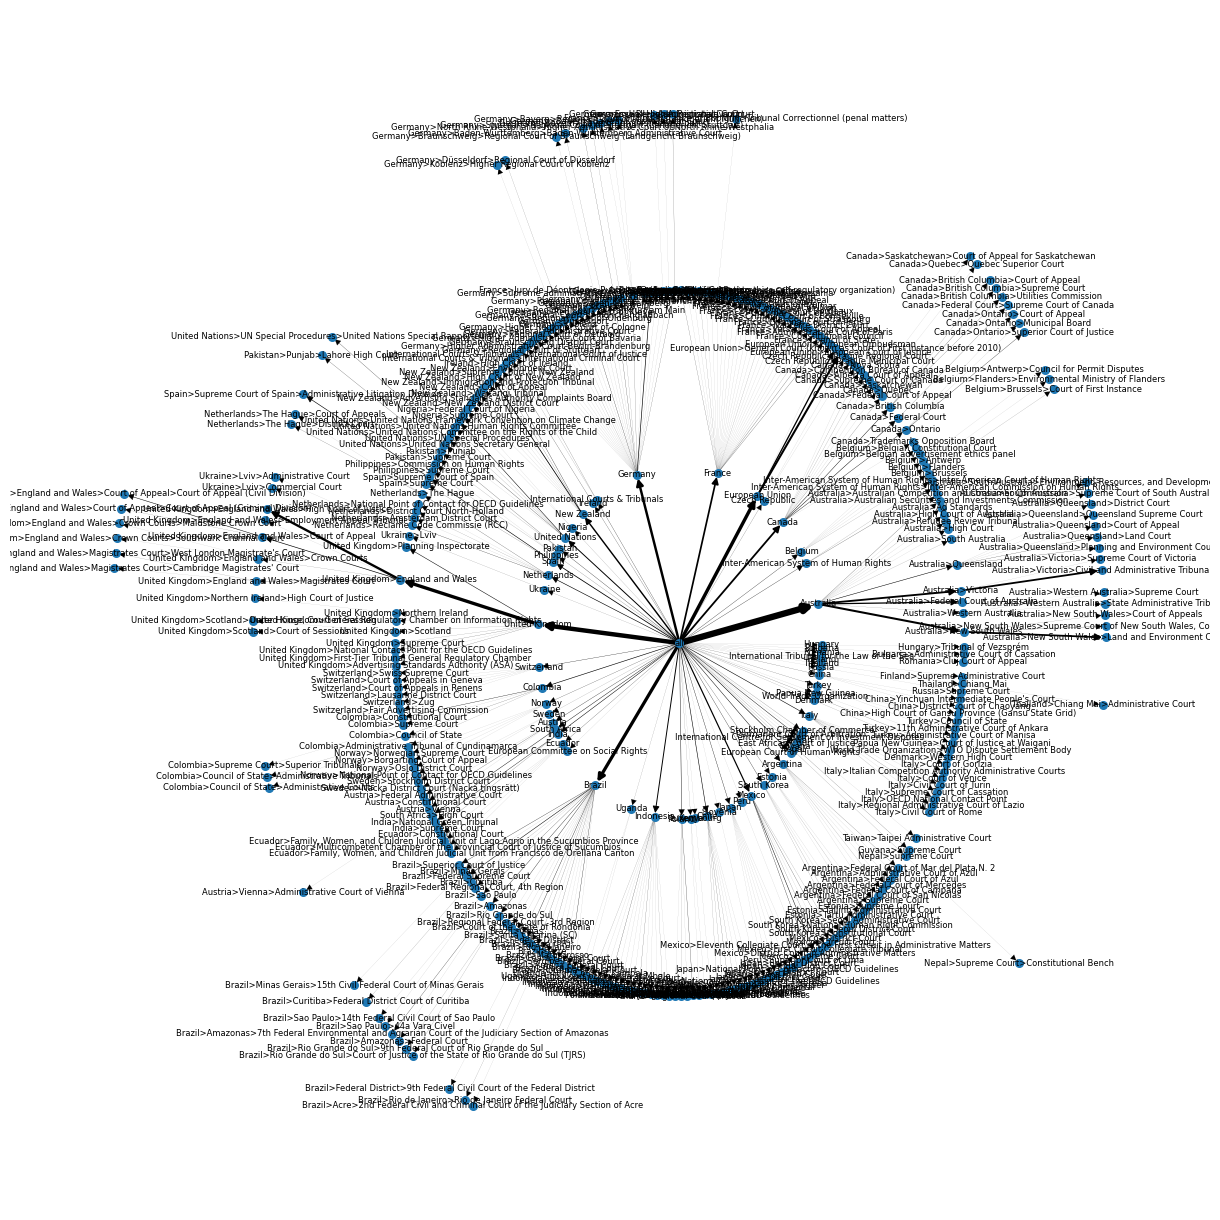

In [164]:
import networkx as nx
import matplotlib.pyplot as plt

jurisdictions_cases = global_cases_df["Jurisdictions_T"].tolist()
# jurisdictions_cases = global_cases_df[~global_cases_df["Jurisdictions"].isna() & global_cases_df["Jurisdictions"].str.contains("Court of Appeal")]["Jurisdictions"].apply(preprocess_fields).tolist()

graph = nx.DiGraph()

for jurisdictions_case in jurisdictions_cases:
    for jurisdictions in jurisdictions_case:
        for i in range(len(jurisdictions)):
            from_node = "all"
            if i != 0:
                from_node = ">".join(jurisdictions[:i])
            
            to_node = ">".join(jurisdictions[:i+1])
            
            existing_edge = graph.get_edge_data(from_node, to_node)

            if existing_edge:
                graph.add_edge(from_node, to_node, weight=existing_edge["weight"] + 1)
            else:
                graph.add_edge(from_node, to_node, weight=1)


pos = nx.nx_agraph.graphviz_layout(graph, prog="twopi", args="", root="all") # , ranksep="1.0 equally"

edges = graph.edges()
weights = [graph[u][v]['weight'] for u,v in edges]

plt.figure(figsize=(12,12))
nx.draw(graph, pos, with_labels=True, node_size=30, font_size=6, width=np.array(weights) / 30)

# label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
# nx.draw_networkx_labels(graph, pos, font_size=14, bbox=label_options)

In [165]:
graph_node_names = list(graph.nodes)
graph_end_edge_names = [v for u,v in graph.edges]
norm_graph = nx.relabel_nodes(graph, {node:i for i, node in enumerate(graph_node_names)})
bokeh_pos = nx.nx_agraph.graphviz_layout(norm_graph, prog="twopi", args="", root="0")

In [166]:
from naat_data import ISO_FLAGS

flag_df = pd.read_csv(ISO_FLAGS)

def update_country_name(df, country, country_rename=None):
    update_index = df[df["Country"].str.contains(country)].index
    df.loc[update_index, "Country"] = country_rename if country_rename else country

for country, country_rename in [("Netherlands", None), ("United Kingdom", None), ("Czechia", "Czech Republic")]:
    update_country_name(flag_df, country, country_rename)

In [167]:
country_list = set()
for jurisdictions_case in jurisdictions_cases:
    for jurisdictions in jurisdictions_case:
        if jurisdictions:
            country_list.add(jurisdictions[0])

country_positions = {k:v for k, v in pos.items() if k in country_list}
country_positions_df = pd.DataFrame(country_positions).T.rename(columns={0:"x",1:"y"}).reset_index().rename(columns={"index":"Country"})


merged_country_df = country_positions_df.merge(flag_df, how="left")
merged_country_df["x"] += bokeh_pos[0][0] - pos["all"][0]

merged_country_df["x"] += (merged_country_df["x"] - bokeh_pos[0][0]) * 0.8
merged_country_df["y"] += (merged_country_df["y"] - bokeh_pos[0][1]) * 0.8

# https://www.worldometers.info/geography/flags-of-the-world/
from bokeh.models import ColumnDataSource, ImageURL

country_source = ColumnDataSource(dict(
    url = merged_country_df["URL"],
    x  = merged_country_df["x"],
    y  = merged_country_df["y"]
))

country_image = ImageURL(url="url", x="x", y="y", w=12, h=8, anchor="center")


In [168]:
import math
from bokeh.palettes import Spectral11

def find_occurrence_count(s, ch):
    return len([i for i, letter in enumerate(s) if letter == ch])

bokeh_center = bokeh_pos[0]

corr_bokeh_pos = {}
node_angles = []
jurisdiction_colors = []
for position, jurisdiction_name in zip(list(bokeh_pos.items()), graph_node_names):
    index = position[0]

    jurisdiction_level = find_occurrence_count(jurisdiction_name, ">") + 1
    
    new_x = position[1][0]
    new_y =  position[1][1]
    if jurisdiction_level > 2:
        new_x -= (new_x - bokeh_center[0]) * 0.1 * (jurisdiction_level - 1)
        new_y -= (new_y - bokeh_center[1]) * 0.1 * (jurisdiction_level - 1)

    corr_bokeh_pos[index] = (new_x, new_y)

    node_angle = 0 if new_x - bokeh_center[0] == 0 else math.atan2(new_y - bokeh_center[1], new_x - bokeh_center[0])
    node_angles.append(node_angle)

    if index == 0:
        jurisdiction_colors.append(Spectral11[0])
    elif jurisdiction_level == 1:
        jurisdiction_colors.append(Spectral11[1])
    elif jurisdiction_level == 2:
        jurisdiction_colors.append(Spectral11[3])
    elif jurisdiction_level == 3:
        jurisdiction_colors.append(Spectral11[7])
    elif jurisdiction_level == 4:
        jurisdiction_colors.append(Spectral11[5])


In [169]:
from bokeh.models import DataTable, TableColumn, HTMLTemplateFormatter

global_cases_df["Url"] = global_cases_df["Case Permalink"]

source = ColumnDataSource(global_cases_df.to_dict(orient="list"))
init_source = ColumnDataSource(global_cases_df.to_dict(orient="list"))

columns = [
        TableColumn(field="Title", title="Title", 
                    formatter=HTMLTemplateFormatter(template='<a href="<%= Url %>" target="_blank"><%= value %></a>')),
        TableColumn(field="Case Categories", title="Case Categories"),
        TableColumn(field="Principal Laws", title="Principal Laws"),
        
        TableColumn(field="Filing Year", title="Filing Year"),
        TableColumn(field="Status", title="Status"),
    ]

data_table = DataTable(source=source, columns=columns, width=800, height=400)


In [170]:
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import (Circle, MultiLine, Image, Div, Rect,
                          NodesAndLinkedEdges,EdgesAndLinkedNodes, Plot, Range1d, TapTool, GraphRenderer, HoverTool,
                          StaticLayoutProvider, WheelZoomTool, PanTool, CategoricalPatternMapper)

from bokeh.layouts import column, row
from bokeh.models.callbacks import SetValue, CustomJS
from bokeh.events import ButtonClick, Tap
from bokeh.palettes import Spectral4

TOOLTIPS = [
    ("jurisdiction","@jurisdiction"),
]

plot = figure(width=800, height=600, tooltips=TOOLTIPS)

plot.grid.grid_line_color = None

# layout_function (function or dict) : a networkx layout function or mapping of node keys to positions.
# The position is a two element sequence containing the x and y coordinate.
# bokeh_graph = from_networkx(norm_graph,  nx.nx_agraph.graphviz_layout, prog="twopi", args="", root=0)


bokeh_graph = GraphRenderer()

bokeh_graph.node_renderer.data_source.data = dict(
    index=list(norm_graph.nodes),
    jurisdiction=graph_node_names,
    color=jurisdiction_colors,
    angle=node_angles)

bokeh_graph.edge_renderer.data_source.data = dict(
    start=[e[0] for e in list(norm_graph.edges)],
    end=[e[1] for e in list(norm_graph.edges)],
    cases=[norm_graph[u][v]['weight'] for u,v in norm_graph.edges],
    jurisdiction=graph_end_edge_names)

bokeh_graph.layout_provider = StaticLayoutProvider(graph_layout=corr_bokeh_pos)

bokeh_graph.node_renderer.glyph = Rect(width=8, height=2.5, fill_color="color", angle="angle")
bokeh_graph.node_renderer.selection_glyph = Rect(width=8, height=2.5, fill_color="color", angle="angle")
bokeh_graph.node_renderer.hover_glyph = Rect(width=8, height=2.5, fill_color="color", angle="angle")

bokeh_graph.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8)
bokeh_graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
bokeh_graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

bokeh_graph.selection_policy = NodesAndLinkedEdges()
bokeh_graph.inspection_policy = NodesAndLinkedEdges()

# callbacks
my_tap_tool = TapTool()
plot.add_tools(my_tap_tool)

# https://docs.bokeh.org/en/latest/docs/examples/interaction/js_callbacks/customjs_for_selection.html
bokeh_graph.node_renderer.data_source.selected.js_on_change(
    "indices", 
    CustomJS(
        args=dict(source=source, init_source=init_source, edge_names=graph_node_names),
        code="""
        function getAllIndexes(arr, val) {
            var indexes = [];
            for(var i = 0; i < arr.length; i++)
                if (typeof arr[i] === 'string' && arr[i].includes(val)) {
                    indexes.push(i);
                }
            return indexes;
        }

        var selected_jurisdiction = edge_names[cb_obj.indices[0]];

        if (typeof selected_jurisdiction === "undefined" || selected_jurisdiction === "all"){
            source.data = init_source.data;
        } else {
            var selected_cases_indices = getAllIndexes(init_source.data["Jurisdictions"], selected_jurisdiction);
            
            const myFilter = (obj, inds) => Object.entries(obj).reduce((acc, [key, val]) => {
                acc[key] = Array.isArray(val) ? inds.map(i => val[i]) : val;
                return acc;
            }, {});

            source.data = myFilter(init_source.data, selected_cases_indices);
        }
        """)
)

# https://stackoverflow.com/questions/47517922/python-bokeh-customjs-callback-update-datatable-widget
# value.replace("&amp;", "&")

plot.add_glyph(country_source, country_image)

plot.renderers.append(bokeh_graph)

layout = column(plot, data_table)

# specify the name of the output file
output_file('graph.html')
show(layout)

## Jurisdictions special characters


* "|": and
* ">": is part of
* "\&amp;": &
* ".": abbreviation (N. 2)

In [142]:
specials = global_cases_df[~global_cases_df["Jurisdictions"].isna()]["Jurisdictions"].str.findall("[^A-Za-z0-9\sáéöúüźńäÉíóôŁ]").tolist()
set(sum(specials, []))

{'&', "'", '(', ')', ',', '-', '.', ';', '>', '|'}

In [145]:
global_cases_df[~global_cases_df["Jurisdictions"].isna() & global_cases_df["Jurisdictions"].str.contains("Court of Appeal")]

,Title,ID,Case Permalink,Case Categories,Jurisdictions,Principal Laws,Summary,Reporter Info or Case Number,Filing Year,Status,Core Object,Jurisdictions_T,Case Categories_T,Principal Laws_T
40,Macquarie Generation v. Hodgson,2588,https://climatecasechart.com/non-us-case/macqu...,Suits against governments>GHG emissions reduct...,Australia>New South Wales>Court of Appeals,Australia>Protection of the Environment Operat...,Peter Gray & Naomi Hodgson v. Macquarie Genera...,[2011] NSWCA 424; [2010] NSWLEC 34 (Australia),NaN,Decided on Appeal,Challenge court finding implied permit conditi...,"[[Australia, New South Wales, Court of Appeals]]","[[Suits against governments, GHG emissions red...","[[Australia, Protection of the Environment Ope..."
53,Queensland Conservation Council Inc. v. Xstrat...,2616,https://climatecasechart.com/non-us-case/queen...,Suits against governments>Environmental assess...,Australia>Queensland>Court of Appeal,Australia>Mining and other Legislation Amendme...,An Australian state court reversed a lower tri...,[2007] QCA 338,2006.0,Decided,Whether there was a breach of natural justice ...,"[[Australia, Queensland, Court of Appeal]]","[[Suits against governments, Environmental ass...","[[Australia, Mining and other Legislation Amen..."
86,Syncrude Canada Ltd. v. Attorney General of Ca...,2682,https://climatecasechart.com/non-us-case/syncr...,Suits against governments>GHG emissions reduct...,Canada>Federal Court of Appeal,Canada>Environmental Policy Act,"In 2011, Syncrude Canada requested independent...",[2016] FCA 160,NaN,Appeal denied,Challenge to government's authority to impose ...,"[[Canada, Federal Court of Appeal]]","[[Suits against governments, GHG emissions red...","[[Canada, Environmental Policy Act]]"
144,New Zealand Climate Science Education Trust v....,2799,https://climatecasechart.com/non-us-case/new-z...,Suits against governments>Access to information,New Zealand>High Court of New Zealand|New Zeal...,New Zealand>Crown Research Institutes Act 1992,The New Zealand Climate Science Education Trus...,[2012] NZHC 2297; [2013] NZCA 555,NaN,Dismissed,Judicial review application in relation to pub...,"[[New Zealand, High Court of New Zealand], [Ne...","[[Suits against governments, Access to informa...","[[New Zealand, Crown Research Institutes Act 1..."
168,Urgenda Foundation v. State of the Netherlands,2823,https://climatecasechart.com/non-us-case/urgen...,Suits against governments>GHG emissions reduct...,Netherlands>The Hague>Court of Appeals|Netherl...,Netherlands>Constitution|European Convention o...,"A Dutch environmental group, the Urgenda Found...",[2015] HAZA C/09/00456689,2015.0,Decided,Seeking declaratory judgment and injunction to...,"[[Netherlands, The Hague, Court of Appeals], [...","[[Suits against governments, GHG emissions red...","[[Netherlands, Constitution], [European Conven..."
198,R. (on the application of Swiss International ...,2854,https://climatecasechart.com/non-us-case/r-on-...,Suits against governments>GHG emissions reduct...,United Kingdom>England and Wales>Court of Appe...,European Union>Secondary Law>Decision 377/2013...,The European Union temporarily suspended the g...,[2015] EWCA Civ 331,NaN,Questions referred to the European Union Court...,Challenge validity of EU decision suspending g...,"[[United Kingdom, England and Wales, Court of ...","[[Suits against governments, GHG emissions red...","[[European Union, Secondary Law, Decision 377/..."
202,Greenpeace Nordic Ass’n v. Ministry of Petrole...,3593,https://climatecasechart.com/non-us-case/green...,Suits against governments>Environmental assess...,Norway>Norwegian Supreme Court|Norway>Borgarti...,Norway>Constitution|European Convention on Hum...,A coalition of environmental groups sought a d...,HR-2020-846-J,2016.0,Decided,Constitutionality of Norwegian government deci...,"[[Norway, Norwegian Supreme Court], [Norway, B...","[[Suits against governments, Environmental ass...","[[Norway, Constitution], [European Convention ..."

In [144]:
print(pd.DataFrame(global_cases_df[~global_cases_df["Jurisdictions"].isna() & global_cases_df["Jurisdictions"].str.contains("Court of Appeal")]["Jurisdictions"]).to_markdown())

|     | Jurisdictions                                                                                                                                                                                                                                                         |
|----:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  40 | Australia>New South Wales>Court of Appeals                                                                                                                                                                                                                            |
|  53 | Australia>Queensland>Court of Appeal                                                                                                                                            

## Case special characters


* "|": and
* ">": is part of
* "\&amp;": &
* ".": abbreviation (N. 2)

In [80]:
specials = global_cases_df[~global_cases_df["Case Categories"].isna()]["Case Categories"].str.findall("[^A-Za-z0-9\sáéöúüźńäÉíóôŁ]").tolist()
set(sum(specials, []))

{',', '-', '/', '>', '|'}

## Principal Laws special characters

* "|": and
* ">": is part of
* "\&amp;": &
* ".": abbreviation (abbr.)

Unknown character usage
* "¬" in "European Union>Secondary Law>Directives>¬ 2005/29/EC Unfair Commercial Practices Directive"

In [30]:
specials = global_cases_df[~global_cases_df["Principal Laws"].isna()]["Principal Laws"].str.findall("[^A-Za-z0-9\sáéöúü]").tolist()
set(sum(specials, []))

{'&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '>',
 '|',
 '¬',
 '°',
 'º',
 '–',
 '’'}

In [61]:
print(pd.DataFrame(global_cases_df[~global_cases_df["Principal Laws"].isna() & global_cases_df["Principal Laws"].str.contains("’")]["Principal Laws"]).to_markdown())

|     | Principal Laws                                                                                                                |
|----:|:------------------------------------------------------------------------------------------------------------------------------|
| 622 | Economic and Cultural Rights|African Charter on Human and Peoples’ Rights|Nigeria>Constitution of Federal Republic of Nigeria |


zzz

In [4]:
ax = global_cases_df.groupby(by="Geography")["Id"].count().sort_index(ascending=False).plot(figsize=(14, 10), kind="barh")

KeyError: 'Geography'

<Axes: ylabel='Jurisdiction'>

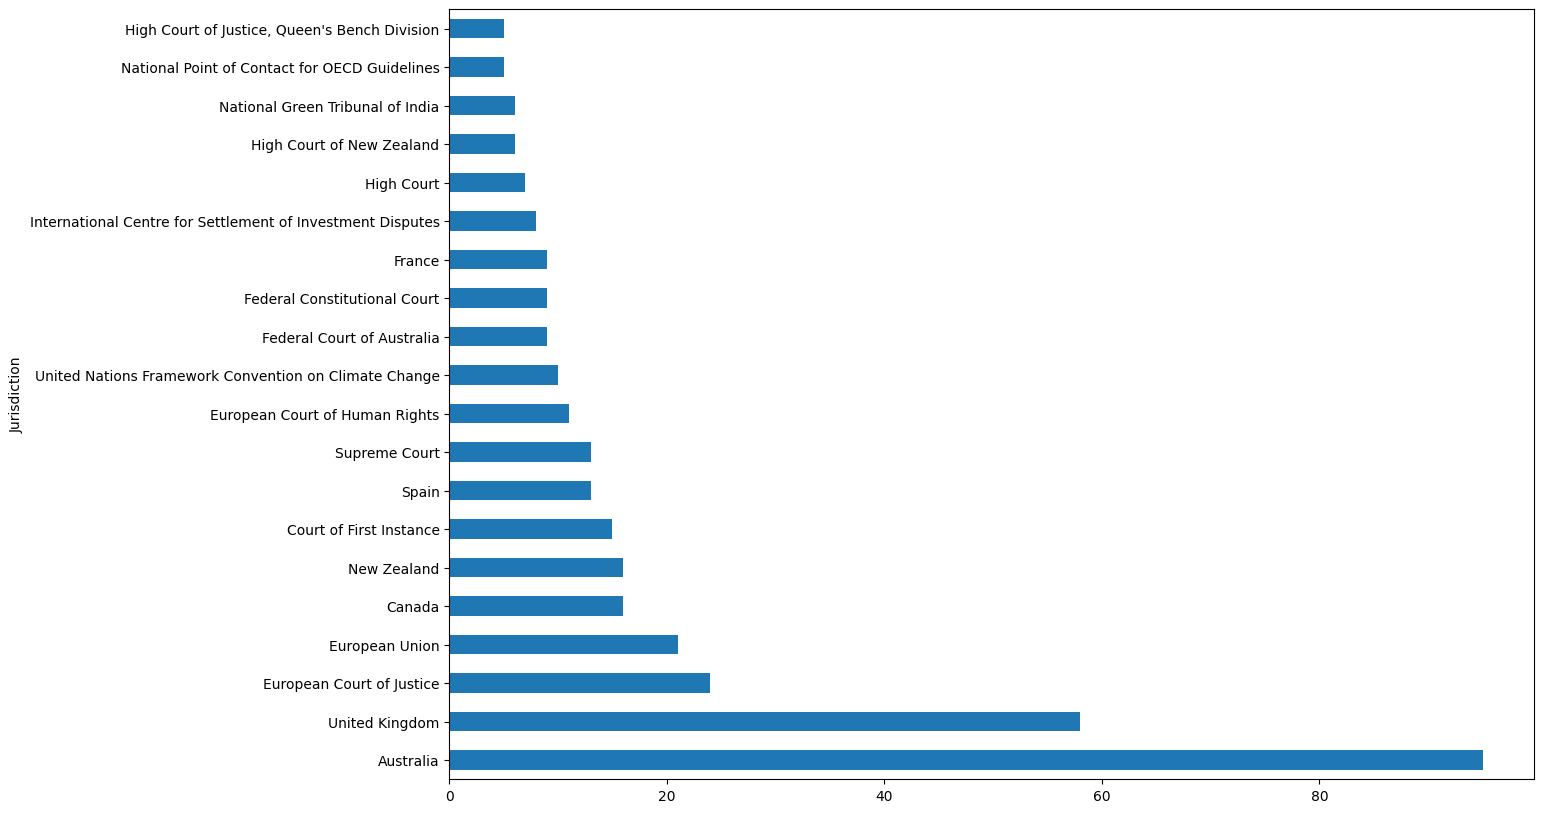

In [49]:
global_cases_df.groupby(by="Jurisdiction")["Id"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='External Laws'>

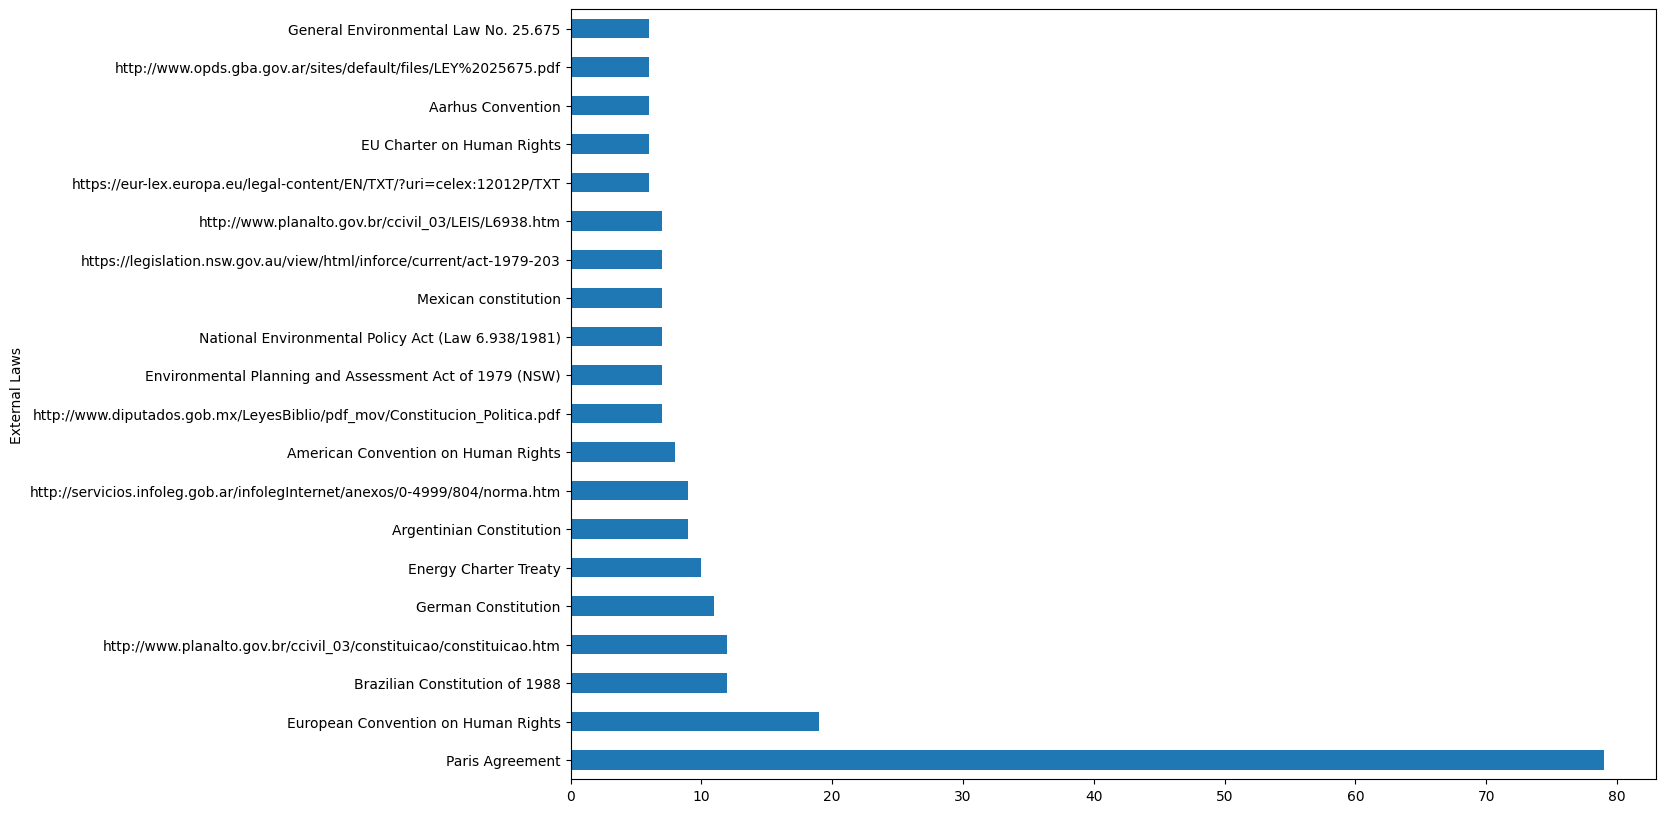

In [267]:
notna_field = global_cases_df["Connected External Laws"].notna()
external_laws = global_cases_df["Connected External Laws"][notna_field].str.split(pat=r"\|;(?!$)|\|(?!$)|;(?!$)", regex=True).to_list()
external_laws_df = pd.DataFrame(sum(external_laws, []), columns=["External Laws"]).reset_index(drop=False)
external_laws_df["External Laws"] = external_laws_df["External Laws"].str.replace("|", "", regex=False).str.strip()
external_laws_df.groupby("External Laws")["index"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='Sectors'>

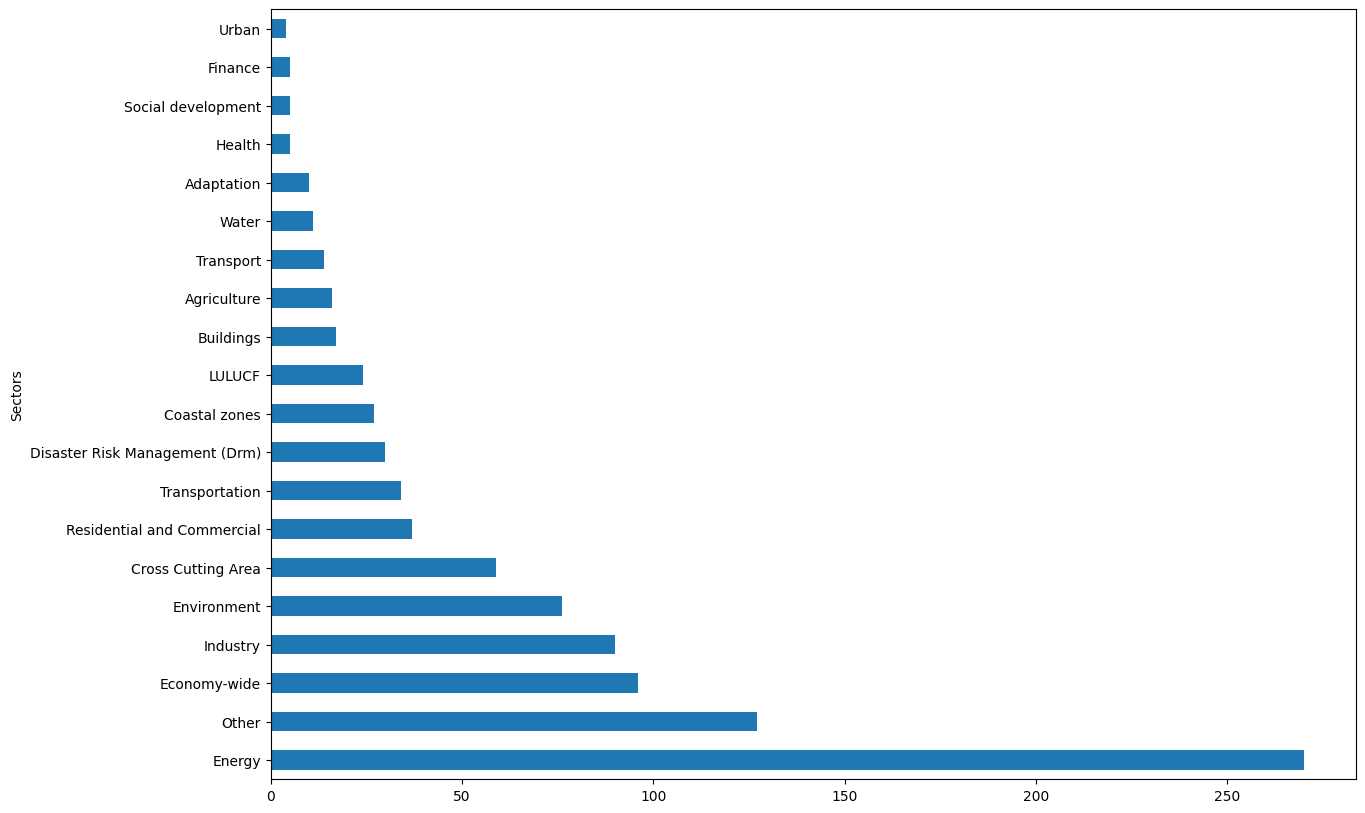

In [223]:
notna_field = global_cases_df["Sectors"].notna()
sectors = global_cases_df["Sectors"][notna_field].str.split(pat=r";(?!$)", regex=True).to_list()
sectors_df = pd.DataFrame(sum(sectors, []), columns=["Sectors"]).reset_index(drop=False)
sectors_df["Sectors"] = sectors_df["Sectors"].str.strip()
sectors_df.groupby("Sectors")["index"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

In [224]:
print(sectors_df.groupby("Sectors")["index"].count().sort_values(ascending=False).to_markdown())

| Sectors                        |   index |
|:-------------------------------|--------:|
| Energy                         |     270 |
| Other                          |     127 |
| Economy-wide                   |      96 |
| Industry                       |      90 |
| Environment                    |      76 |
| Cross Cutting Area             |      59 |
| Residential and Commercial     |      37 |
| Transportation                 |      34 |
| Disaster Risk Management (Drm) |      30 |
| Coastal zones                  |      27 |
| LULUCF                         |      24 |
| Buildings                      |      17 |
| Agriculture                    |      16 |
| Transport                      |      14 |
| Water                          |      11 |
| Adaptation                     |      10 |
| Health                         |       5 |
| Social development             |       5 |
| Finance                        |       5 |
| Urban                          |       4 |
| Public S

<Axes: ylabel='Responses'>

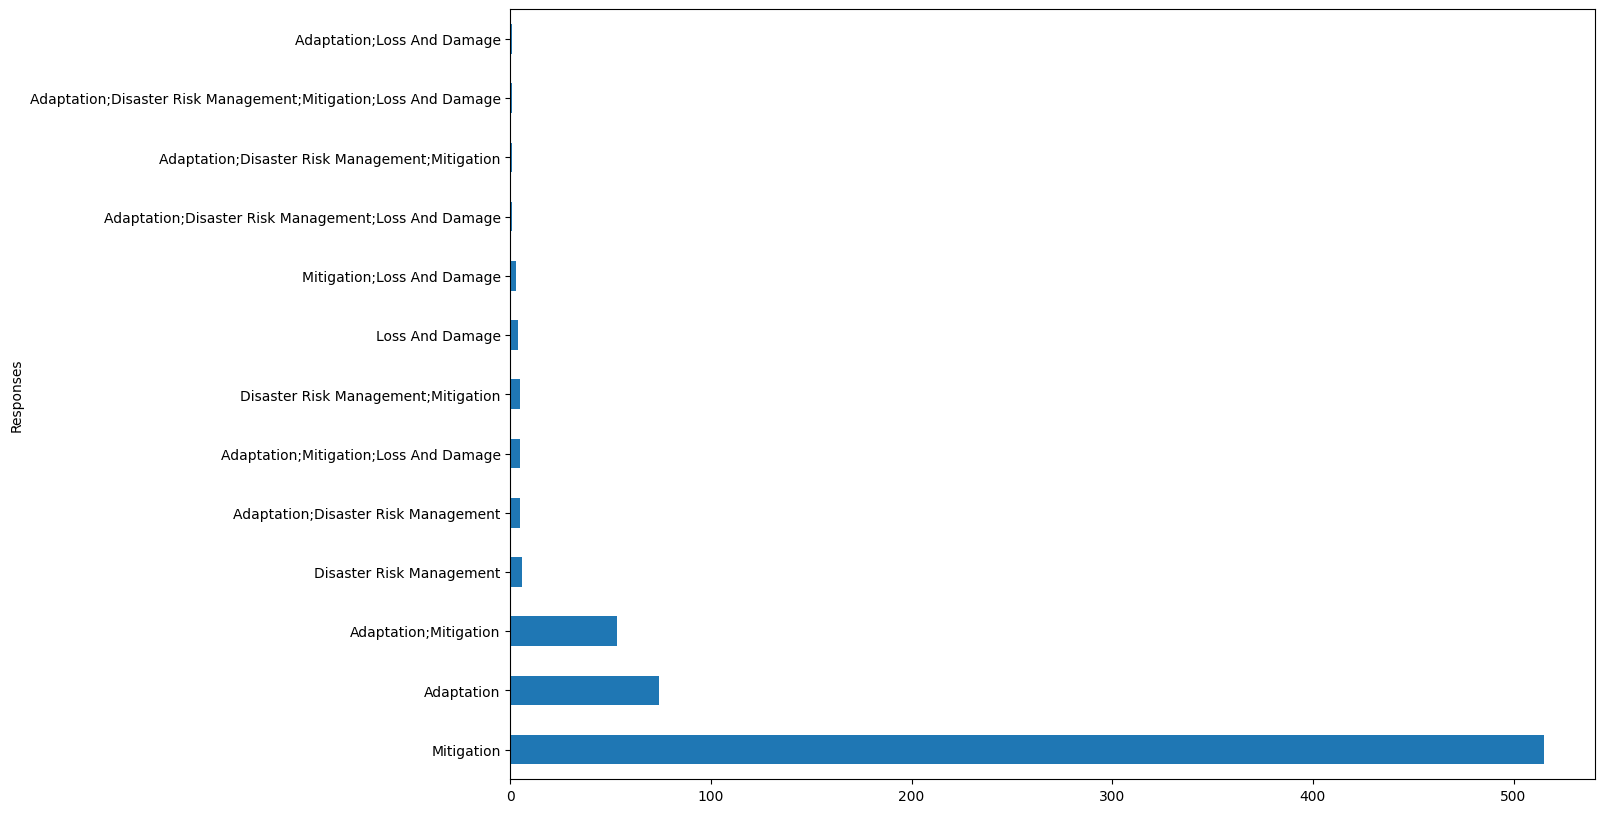

In [231]:
notna_field = global_cases_df["Responses"].notna()
global_cases_df[notna_field].groupby(by="Responses")["Id"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='Connected Internal Laws'>

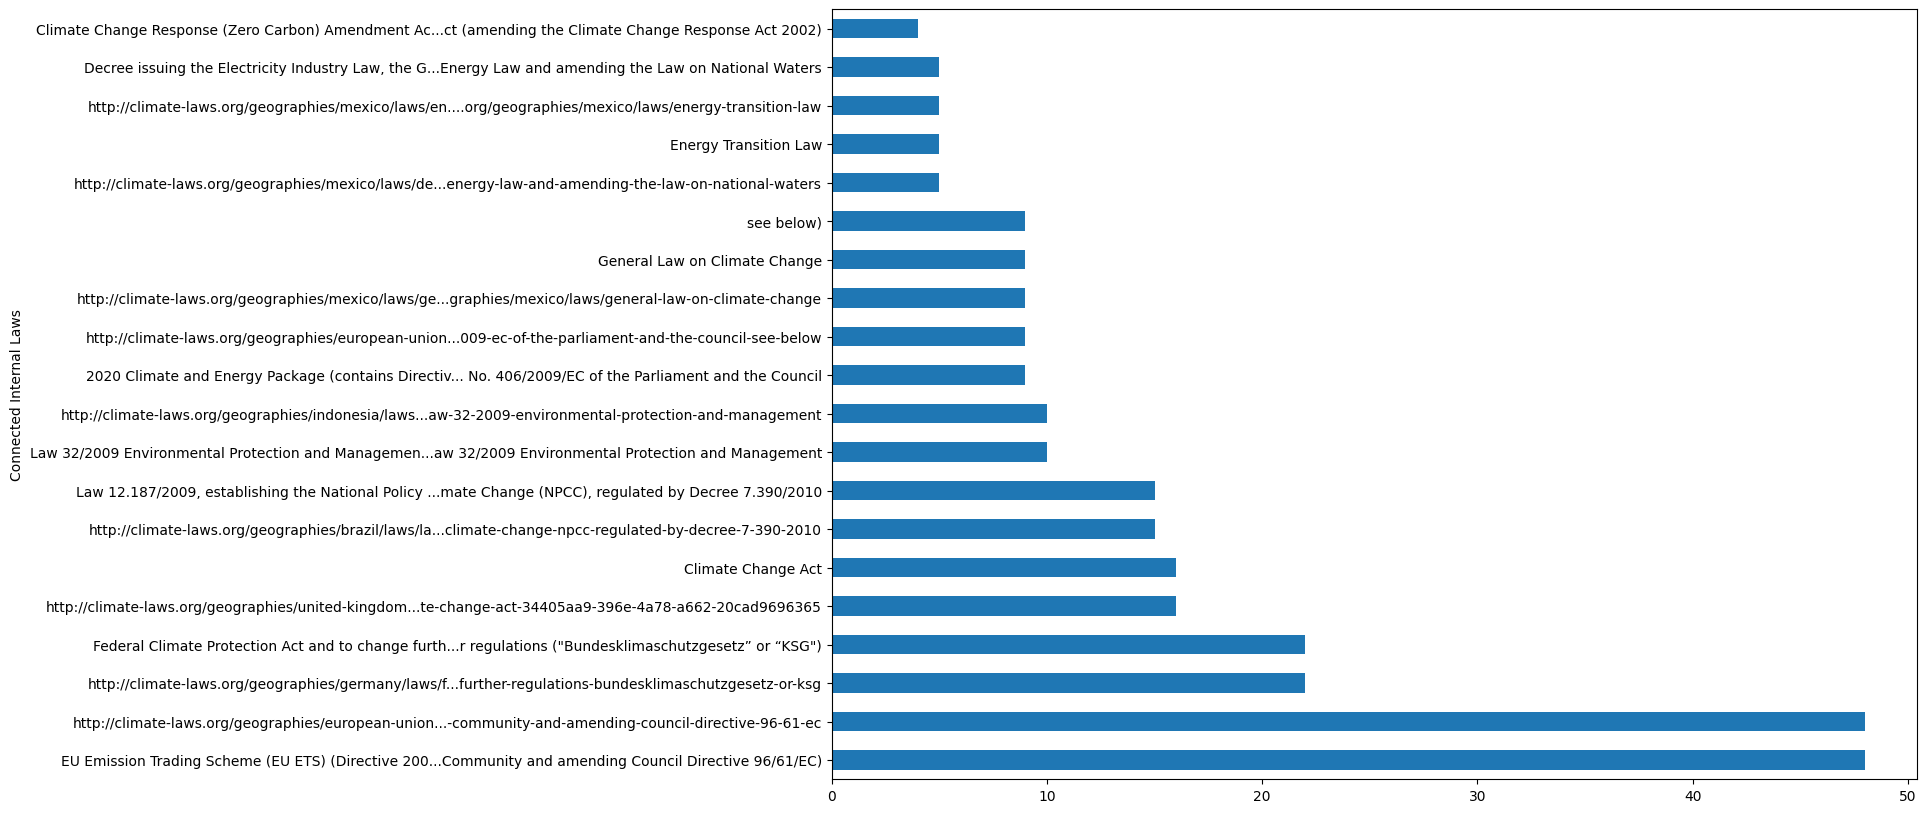

In [291]:
notna_field = global_cases_df["Connected Internal Laws"].notna()
internal_laws = global_cases_df["Connected Internal Laws"][notna_field].str.split(pat=r"\|(?!$)|;(?!$)", regex=True).to_list()
internal_laws_df = pd.DataFrame(sum(internal_laws, []), columns=["Connected Internal Laws"]).reset_index(drop=False)
internal_laws_df["Connected Internal Laws"] = internal_laws_df["Connected Internal Laws"].str.strip()
internal_laws_df["Connected Internal Laws"] = internal_laws_df["Connected Internal Laws"].apply(lambda x: x[:50] + ("..." + x[-50:] if len(x) > 50 else ""))
internal_laws_df = internal_laws_df.groupby("Connected Internal Laws")["index"].count().sort_values(ascending=False)

internal_laws_df[:20].plot(figsize=(14, 10), kind="barh")